In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
!pip install xgboost
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from google.colab import files

!pip install geopandas cartopy matplotlib
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#avoid warning messages
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 77.4 MB/s eta 0:00:00


In [ ]:
file_path = "/content/drive/MyDrive/CSE-427_CSV_file/Eartquakes-1990-2023.csv"

# Load the data with error handling
df = pd.read_csv(
    file_path,
    delimiter=",",              # Ensure the correct delimiter
    on_bad_lines="skip",        # Skip problematic rows
    encoding="utf-8",           # Handle special characters
    low_memory=False            # Load larger files without performance issues
)

print(df.shape)
print(df.head())

(3445751, 12)
           time                                 place    status  tsunami  \
0  631153353990     12 km NNW of Meadow Lakes, Alaska  reviewed        0   
1  631153491210            14 km S of Volcano, Hawaii  reviewed        0   
2  631154083450            7 km W of Cobb, California  reviewed        0   
3  631155512130  11 km E of Mammoth Lakes, California  reviewed        0   
4  631155824490                16km N of Fillmore, CA  reviewed        0   

   significance   data_type  magnitude        state   longitude   latitude  \
0            96  earthquake       2.50       Alaska -149.669200  61.730200   
1            31  earthquake       1.41       Hawaii -155.212333  19.317667   
2            19  earthquake       1.11   California -122.806167  38.821000   
3            15  earthquake       0.98   California -118.846333  37.664333   
4           134  earthquake       2.95   California -118.934000  34.546000   

    depth                              date  
0  30.100  199

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445751 entries, 0 to 3445750
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   time          int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitude     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.5+ MB


In [ ]:
df.describe(include="all")

,time,place,status,tsunami,significance,data_type,magnitude,state,longitude,latitude,depth,date
count,3.445751e+06,3445751,3445751,3.445751e+06,3.445751e+06,3445751,3.445751e+06,3445751,3.445751e+06,3.445751e+06,3.445751e+06,3445751
unique,NaN,531130,6,NaN,NaN,25,NaN,858,NaN,NaN,NaN,3428775
top,NaN,"6 km W of Cobb, California",reviewed,NaN,NaN,earthquake,NaN,California,NaN,NaN,NaN,2022-03-02 23:42:23.449000+00:00
freq,NaN,24202,3224825,NaN,NaN,3361846,NaN,866675,NaN,NaN,NaN,4
mean,1.247124e+12,NaN,NaN,4.434447e-04,7.400973e+01,NaN,1.774076e+00,NaN,-1.012876e+02,3.746483e+01,2.285387e+01,NaN
std,2.976292e+11,NaN,NaN,2.105346e-02,1.016364e+02,NaN,1.291055e+00,NaN,7.697416e+01,2.041577e+01,5.484938e+01,NaN
min,6.311534e+11,NaN,NaN,0.000000e+00,0.000000e+00,NaN,-9.990000e+00,NaN,-1.799997e+02,-8.442200e+01,-1.000000e+01,NaN
25%,1.024401e+12,NaN,NaN,0.000000e+00,1.300000e+01,NaN,9.100000e-01,NaN,-1.464274e+02,3.406400e+01,3.120000e+00,NaN
50%,1.282338e+12,NaN,NaN,0.000000e+00,3.300000e+01,NaN,1.460000e+00,NaN,-1.189538e+02,3.793567e+01,7.700000e+00,NaN
75%,1.508701e+12,NaN,NaN,0.000000e+00,8.100000e+01,NaN,2.300000e+00,NaN,-1.159277e+02,4.784800e+01,1.612000e+01,NaN


In [ ]:
# selecting the features that will be useful for prediction.

df = df[['time', 'significance', 'magnitude', 'longitude', 'latitude', 'depth']]
df.head()

,time,significance,magnitude,longitude,latitude,depth
0,631153353990,96,2.50,-149.669200,61.730200,30.100
1,631153491210,31,1.41,-155.212333,19.317667,6.585
2,631154083450,19,1.11,-122.806167,38.821000,3.220
3,631155512130,15,0.98,-118.846333,37.664333,-0.584
4,631155824490,134,2.95,-118.934000,34.546000,16.122


In [ ]:
df.isnull().sum()

,0
time,0
significance,0
magnitude,0
longitude,0
latitude,0
depth,0


In [ ]:
df.nunique()

,0
time,3428775
significance,1170
magnitude,933
longitude,733599
latitude,518295
depth,78386


<Figure size 800x600 with 0 Axes>

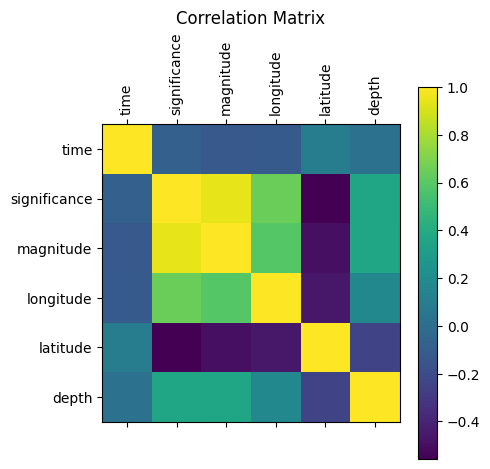

In [ ]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [ ]:
df = df.drop_duplicates()
print(df.shape)

(3428880, 6)


(541868, 6)


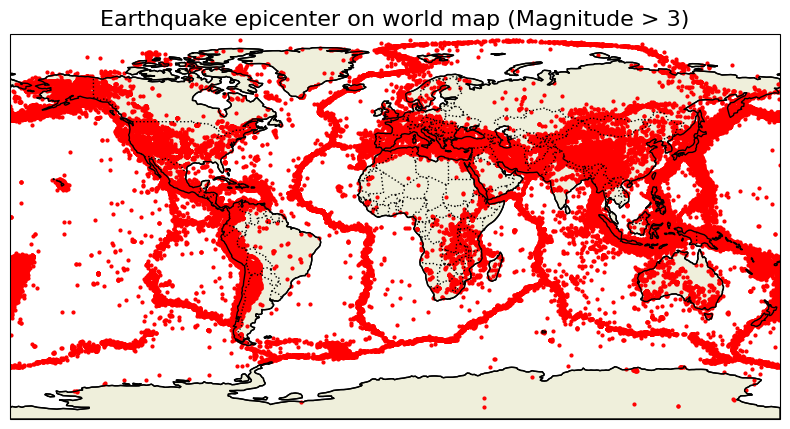

In [ ]:
filtered_data = df[df['magnitude'] > 3]
print(filtered_data.shape)

# Extract latitude and longitude
lats = filtered_data['latitude']
lons = filtered_data['longitude']

# Create the figure and axes
fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Add features to the map
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot the points
ax.scatter(lons, lats, color='red', s=4, transform=ccrs.PlateCarree())

# Add title and labels
ax.set_title("Earthquake epicenter on world map (Magnitude > 3)", fontsize=16)

plt.show()

In [ ]:
# Seperating features and target variable
X = df.drop(columns=['magnitude', 'significance'])  # Features
y_magnitude = df['magnitude']  # Target: Magnitude
y_significance = df['significance']  # Target: Significance

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train_magnitude, y_test_magnitude = train_test_split(X, y_magnitude, test_size=0.2, random_state=42)
X_train, X_test, y_train_significance, y_test_significance = train_test_split(X, y_significance, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# ElasticNet Regression (Combination of L1 and L2 Regularization)
elasticnet_magnitude = ElasticNet(alpha=0.00015998587196060574, l1_ratio=0.6938775510204082)  # Alpha and l1_ratio control regularization strength and mix between L1 and L2
elasticnet_magnitude.fit(X_train_scaled, y_train_magnitude)

elasticnet_significance = ElasticNet(alpha=0.00015998587196060574, l1_ratio=0.6938775510204082)  # Alpha and l1_ratio control regularization strength and mix between L1 and L2
elasticnet_significance.fit(X_train_scaled, y_train_significance)

# Predict with ElasticNet
y_pred_magnitude_elasticnet = elasticnet_magnitude.predict(X_test_scaled)
y_pred_significance_elasticnet = elasticnet_significance.predict(X_test_scaled)

# Evaluate ElasticNet model for Magnitude prediction
mse_elasticnet_magnitude = mean_squared_error(y_test_magnitude, y_pred_magnitude_elasticnet)
mae_elasticnet_magnitude = mean_absolute_error(y_test_magnitude, y_pred_magnitude_elasticnet)
r2_magnitude = r2_score(y_test_magnitude, y_pred_magnitude_elasticnet)

mse_elasticnet_significance = mean_squared_error(y_test_significance, y_pred_significance_elasticnet)
mae_elasticnet_significance = mean_absolute_error(y_test_significance, y_pred_significance_elasticnet)
r2_significance = r2_score(y_test_significance, y_pred_significance_elasticnet)

print(f'ElasticNet Regression for magnitude - MSE: {mse_elasticnet_magnitude}, MAE: {mae_elasticnet_magnitude}')
print(f"R² Score for magnitude: {r2_magnitude:.4f}\n")

print(f'ElasticNet Regression for significance- MSE: {mse_elasticnet_significance}, MAE: {mae_elasticnet_significance}')
print(f"R² Score for significance: {r2_significance:.4f}\n")

ElasticNet Regression for magnitude - MSE: 0.8985025346324518, MAE: 0.7134985203816269
R² Score for magnitude: 0.4612

ElasticNet Regression for significance- MSE: 4652.94129014267, MAE: 46.33973550249798
R² Score for significance: 0.5496



In [ ]:
# Initialize the Decision Tree Regressor
DTR_model_magnitude = DecisionTreeRegressor(random_state=42, max_depth = 13)
DTR_model_significance = DecisionTreeRegressor(random_state=42, max_depth = 13)

# Train the model on the training data
DTR_model_magnitude.fit(X_train_scaled, y_train_magnitude)
DTR_model_significance.fit(X_train_scaled, y_train_significance)

# Predict on the test set
y_pred_magnitude = DTR_model_magnitude.predict(X_test_scaled)
y_pred_significance = DTR_model_significance.predict(X_test_scaled)

# Model evaluation
mae_magnitude = mean_absolute_error(y_test_magnitude, y_pred_magnitude)
print(f"Mean Absolute Error (MAE) for magnitude: {mae_magnitude:.4f}")
mse_magnitude = mean_squared_error(y_test_magnitude, y_pred_magnitude)
print(f"Mean Squared Error (MSE) for magnitude: {mse_magnitude:.4f}")
r2_magnitude = r2_score(y_test_magnitude, y_pred_magnitude)
print(f"R² Score for magnitude: {r2_magnitude:.4f}\n")

mae_significance = mean_absolute_error(y_test_significance, y_pred_significance)
print(f"Mean Absolute Error (MAE) for significance: {mae_significance:.4f}")
mse_significance = mean_squared_error(y_test_significance, y_pred_significance)
print(f"Mean Squared Error (MSE) for significance: {mse_significance:.4f}")
r2_significance = r2_score(y_test_significance, y_pred_significance)
print(f"R² Score for significance: {r2_significance:.4f}")

Mean Absolute Error (MAE) for magnitude: 0.4015
Mean Squared Error (MSE) for magnitude: 0.3420
R² Score for magnitude: 0.7949

Mean Absolute Error (MAE) for significance: 23.9535
Mean Squared Error (MSE) for significance: 1871.4502
R² Score for significance: 0.8189


In [ ]:
# As my dataset is so big, colab didn't allow me to use T4 GPU and v2-8 TPU for unlimited time.
# So, I run each model at a single time and save the predicted output so that I can use that
# later. After runnig and saving all the model, I commented out everything except model evaluation.
# In this way, finally I managed to run whole colab file at a time and show results.

'''#Random forest for magnitude
RFR_model_magnitude = RandomForestRegressor(
    n_estimators=500,    # Number of trees in the forest
    max_depth=20,      # Maximum depth of the tree
    random_state=42,     # Ensures reproducibility
    n_jobs=-1            # Use all available cores for faster training
)

# Train the model on the training data
RFR_model_magnitude.fit(X_train_scaled, y_train_magnitude)

# Predict on the test data
y_pred_magnitude_Random_Forest = RFR_model_magnitude.predict(X_test_scaled)

# Save the numpy array to a CSV file
np.savetxt("y_pred_magnitude_Random_Forest.csv", y_pred_magnitude_Random_Forest, delimiter=",", fmt="%g", header="y_pred_magnitude_Random_Forest", comments="")

# Download the file
files.download("y_pred_magnitude_Random_Forest.csv")'''

#Load the predicted file
file_link = 'https://drive.google.com/file/d/151pjVzhnAk4LSqXCoJ3hgpjCJYxI2Dms/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
y_pred_magnitude_Random_Forest = pd.read_csv(new_link)

# Model evaluation
mae_magnitude = mean_absolute_error(y_test_magnitude, y_pred_magnitude_Random_Forest)
print(f"Mean Absolute Error (MAE) for magnitude: {mae_magnitude:.4f}")
mse_magnitude = mean_squared_error(y_test_magnitude, y_pred_magnitude_Random_Forest)
print(f"Mean Squared Error (MSE) for magnitude: {mse_magnitude:.4f}")
r2_magnitude = r2_score(y_test_magnitude, y_pred_magnitude_Random_Forest)
print(f"R² Score for magnitude: {r2_magnitude:.4f}\n")

'''# Random forest for significance
RFR_model_significance = RandomForestRegressor(
    n_estimators=500,    # Number of trees in the forest
    max_depth=20,        # Maximum depth of the tree
    random_state=42,     # Ensures reproducibility
    n_jobs=-1            # Use all available cores for faster training
)

# Train the model on the training data
RFR_model_significance.fit(X_train_scaled, y_train_significance)

# Predict on the test data
y_pred_significance_Random_Forest = RFR_model_significance.predict(X_test_scaled)

# Save the numpy array to a CSV file
np.savetxt("y_pred_significance_Random_Forest.csv", y_pred_significance_Random_Forest, delimiter=",", fmt="%g", header="y_pred_significance_Random_Forest", comments="")

# Download the file
files.download("y_pred_significance_Random_Forest.csv")'''

#Load the predicted file
file_link = 'https://drive.google.com/file/d/1RzraO2LjspwGf0qTgteyeU0pssyOtFDp/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
y_pred_significance_Random_Forest = pd.read_csv(new_link)

# Model evaluation
mae_significance = mean_absolute_error(y_test_significance, y_pred_significance_Random_Forest)
print(f"Mean Absolute Error (MAE) for significance: {mae_significance:.4f}")
mse_significance = mean_squared_error(y_test_significance, y_pred_significance_Random_Forest)
print(f"Mean Squared Error (MSE) for significance: {mse_significance:.4f}")
r2_significance = r2_score(y_test_significance, y_pred_significance_Random_Forest)
print(f"R² Score for significance: {r2_significance:.4f}")

Mean Absolute Error (MAE) for magnitude: 0.3562
Mean Squared Error (MSE) for magnitude: 0.2810
R² Score for magnitude: 0.8315

Mean Absolute Error (MAE) for significance: 21.5902
Mean Squared Error (MSE) for significance: 1606.2422
R² Score for significance: 0.8445


In [ ]:
# Initialize the XGBoost model for magnitude and significance prediction
''''xgb_magnitude = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=500,
    subsample=0.8,
    n_jobs=-1,
    random_state=42
)

xgb_significance = xgb.XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=500,
    subsample=0.8,
    n_jobs=-1,
    random_state=42
)

# Train the model for predicting magnitude and significance
xgb_magnitude.fit(X_train_scaled, y_train_magnitude)
xgb_significance.fit(X_train_scaled, y_train_significance)

# Predict on test set
y_pred_magnitude_xgb = xgb_magnitude.predict(X_test_scaled)
y_pred_significance_xgb = xgb_significance.predict(X_test_scaled)

# Save the numpy array to a CSV file
np.savetxt("y_pred_magnitude_xgb.csv", y_pred_magnitude_xgb, delimiter=",", fmt="%g", header="y_pred_magnitude_xgb", comments="")

# Download the file
files.download("y_pred_magnitude_xgb.csv")

# Save the numpy array to a CSV file
np.savetxt("y_pred_significance_xgb.csv", y_pred_significance_xgb, delimiter=",", fmt="%g", header="y_pred_significance_xgb", comments="")

# Download the file
files.download("y_pred_significance_xgb.csv")'''

#Load the predicted file
file_link = 'https://drive.google.com/file/d/15RJDokw0zqfh8WLnrDMeLe0bZSUFbRp3/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
y_pred_magnitude_xgb = pd.read_csv(new_link)

#Load the predicted file
file_link = 'https://drive.google.com/file/d/1AAGoriMllcgs1az0bF2_5yyA5Bgd31QI/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
y_pred_significance_xgb = pd.read_csv(new_link)

# Model evaluation
mae_magnitude = mean_absolute_error(y_test_magnitude, y_pred_magnitude_xgb)
print(f"Mean Absolute Error (MAE) for magnitude: {mae_magnitude:.4f}")
mse_magnitude = mean_squared_error(y_test_magnitude, y_pred_magnitude_xgb)
print(f"Mean Squared Error (MSE) for magnitude: {mse_magnitude:.4f}")
r2_magnitude = r2_score(y_test_magnitude, y_pred_magnitude_xgb)
print(f"R² Score for magnitude: {r2_magnitude:.4f}\n")

mae_significance = mean_absolute_error(y_test_significance, y_pred_significance_xgb)
print(f"Mean Absolute Error (MAE) for significance: {mae_significance:.4f}")
mse_significance = mean_squared_error(y_test_significance, y_pred_significance_xgb)
print(f"Mean Squared Error (MSE) for significance: {mse_significance:.4f}")
r2_significance = r2_score(y_test_significance, y_pred_significance_xgb)
print(f"R² Score for significance: {r2_significance:.4f}")

Mean Absolute Error (MAE) for magnitude: 0.3863
Mean Squared Error (MSE) for magnitude: 0.3194
R² Score for magnitude: 0.8085

Mean Absolute Error (MAE) for significance: 22.9503
Mean Squared Error (MSE) for significance: 1737.6953
R² Score for significance: 0.8318


In [ ]:
# LSTM based RNN model
'''scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for RNN (3D input: samples, timesteps, features)
X_rnn = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Train-Test Split
X_train, X_test, y_train_magnitude, y_test_magnitude = train_test_split(X_rnn, y_magnitude, test_size=0.2, random_state=42)

#RNN Model with an additional LSTM layer
rnn_model_magnitude = Sequential([
    LSTM(256, activation='tanh', return_sequences=True, input_shape=(X_rnn.shape[1], X_rnn.shape[2])),
    Dropout(0.2),
    LSTM(128, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='tanh'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')  # Regression output
])

rnn_model_magnitude.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
rnn_model_magnitude.fit(X_train, y_train_magnitude, epochs=50, batch_size=128, validation_split=0.1)

# Predictions and R² score
y_pred_magnitude_rnn = rnn_model_magnitude.predict(X_test)

# Save the numpy array to a CSV file
np.savetxt("y_pred_magnitude_rnn.csv", y_pred_magnitude_rnn, delimiter=",", fmt="%g", header="y_pred_magnitude_rnn", comments="")

# Download the file
files.download("y_pred_magnitude_rnn.csv")



# Train-Test Split for significance predinction
X_train, X_test, y_train_significance, y_test_significance = train_test_split(X_rnn, y_significance, test_size=0.2, random_state=42)

# RNN Model with an additional LSTM layer
rnn_model_significance = Sequential([
    LSTM(256, activation='tanh', return_sequences=True, input_shape=(X_rnn.shape[1], X_rnn.shape[2])),
    Dropout(0.2),
    LSTM(128, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(64, activation='tanh'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

rnn_model_significance.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
rnn_model_significance.fit(X_train, y_train_significance, epochs=50, batch_size=128, validation_split=0.1)

# Predictions
y_pred_significance_rnn = rnn_model_significance.predict(X_test)

# Save the numpy array to a CSV file
np.savetxt("y_pred_significance_rnn.csv", y_pred_significance_rnn, delimiter=",", fmt="%g", header="y_pred_significance_rnn", comments="")

# Download the file
files.download("y_pred_significance_rnn.csv")'''

#Load the predicted file of magnitude
file_link = 'https://drive.google.com/file/d/1jIUuzhlBFsuR8srv4pbTJoyfu0Rjdo5A/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
y_pred_magnitude_rnn = pd.read_csv(new_link)

#Load the predicted file of significance
file_link = 'https://drive.google.com/file/d/18XboFXbfnnONC6x2Fuz9qytg0NrJ3cPH/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'

y_pred_significance_rnn = pd.read_csv(new_link)

# Model evaluation
mae_magnitude = mean_absolute_error(y_test_magnitude, y_pred_magnitude_rnn)
print(f"Mean Absolute Error (MAE) for magnitude: {mae_magnitude:.4f}")
mse_magnitude = mean_squared_error(y_test_magnitude, y_pred_magnitude_rnn)
print(f"Mean Squared Error (MSE) for magnitude: {mse_magnitude:.4f}")
r2_magnitude = r2_score(y_test_magnitude, y_pred_magnitude_rnn)
print(f"R² Score for magnitude: {r2_magnitude:.4f}\n")

mae_significance = mean_absolute_error(y_test_significance, y_pred_significance_rnn)
print(f"Mean Absolute Error (MAE) for significance: {mae_significance:.4f}")
mse_significance = mean_squared_error(y_test_significance, y_pred_significance_rnn)
print(f"Mean Squared Error (MSE) for significance: {mse_significance:.4f}")
r2_significance = r2_score(y_test_significance, y_pred_significance_rnn)
print(f"R² Score for significance: {r2_significance:.4f}")

Mean Absolute Error (MAE) for magnitude: 0.3926
Mean Squared Error (MSE) for magnitude: 0.3324
R² Score for magnitude: 0.8007

Mean Absolute Error (MAE) for significance: 23.6133
Mean Squared Error (MSE) for significance: 1810.5342
R² Score for significance: 0.8248
